In [1]:
using Pkg;
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Work/PhD_Thesis/SNImproved2bbSpectra`


In [2]:
# Pkg.add("Revise")
# Pkg.add("StatsPlots")
# Pkg.add("UnROOT")
# Pkg.add("StatsBase")
# Pkg.add("LinearAlgebra")
# Pkg.add("FHist")
# Pkg.add("DataFramesMeta")
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Polynomials");

In [3]:
using Revise
using StatsPlots, UnROOT, StatsBase, LinearAlgebra
using FHist, DataFramesMeta, Distributions

ENV["COLUMNS"] = 2000
ENV["LINES"] = 20

gr()
default(fmt = :jpg)
theme(
    :dao;
    size           = (800, 800),
    legend         = :topleft,
    guidefontsize  = 16,
    tickfontsize   = 12,
    titlefontsize  = 16,
    legendfontsize = 12,
    left_margin    = 4Plots.mm,
    right_margin   = 8Plots.mm,
    top_margin     = 4Plots.mm,
    bottom_margin  = 6Plots.mm,
    dpi            = 5,
    :colorbar_titlefontsize => 16,
    widen = :false
);

In [4]:
include("/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/MiscFuncs.jl")
using .MiscFuncs

Sampling Rejection

In [5]:

function solve_quadratic(a, b, c)
    d  = sqrt(b^2 - 4*a*c)
    return (-b - d) / (2*a), (-b + d) / (2*a)
end

solve_quadratic (generic function with 1 method)

In [6]:
function sample_theta_dif(_k::Real)
    
    if (_k == 0.0)
        return 0.5
    end
    
    a = _k/4 
    b = 1/2
    c = 1/2 - _k/4 - rand(Uniform())
    θ = solve_quadratic(a,b,c)
    if( -1.0 <= θ[1] <= 1.0 )
        return θ[1]
    elseif ( -1.0 <= θ[2] <= 1.0 )
        return θ[2]
    else
        @show "soulution is outside of range u ∈ (-1.0, 1.0)"
    end
    return -100.0
end

sample_theta_dif (generic function with 1 method)

In [39]:
xs1 = []
for _ in 1:1e8
    push!(xs1, sample_theta_dif(-0.88))
       
end

In [66]:
theme(
    :dao;
    size           = (800, 800),
    legend         = :topleft,
    guidefontsize  = 24,
    tickfontsize   = 24,
    titlefontsize  = 24,
    legendfontsize = 32,
    left_margin    = 4Plots.mm,
    right_margin   = 8Plots.mm,
    top_margin     = 4Plots.mm,
    bottom_margin  = 6Plots.mm,
    dpi            = 200,
    :fontfamily => "Helvetica Bold",
    :colorbar_titlefontsize => 20,
    widen = :false,
    :markerstrokewidth => 1,
    :markerstrokecolor => :black,
);

In [40]:
sh1 = StatsBase.fit(Histogram{Float32},acosd.(xs1), collect(0:1:180) )


Histogram{Float32, 1, Tuple{Vector{Int64}}}
edges:
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  171, 172, 173, 174, 175, 176, 177, 178, 179, 180]
weights: Float32[885.0, 2803.0, 4635.0, 6437.0, 8293.0, 10220.0, 12405.0, 14561.0, 17034.0, 18995.0  …  269017.0, 240809.0, 212475.0, 185016.0, 156940.0, 128322.0, 100105.0, 71190.0, 43004.0, 14535.0]
closed: left
isdensity: false

In [41]:
sh1.weights = sh1.weights ./ maximum(sh1.weights)


180-element Vector{Float32}:
 0.0008114204
 0.0025699565
 0.0042496426
 0.005901823
 0.0076035135
 0.009370301
 0.011373638
 0.013350387
 ⋮
 0.16963363
 0.14389189
 0.117653206
 0.09178219
 0.065271206
 0.039428614
 0.013326549

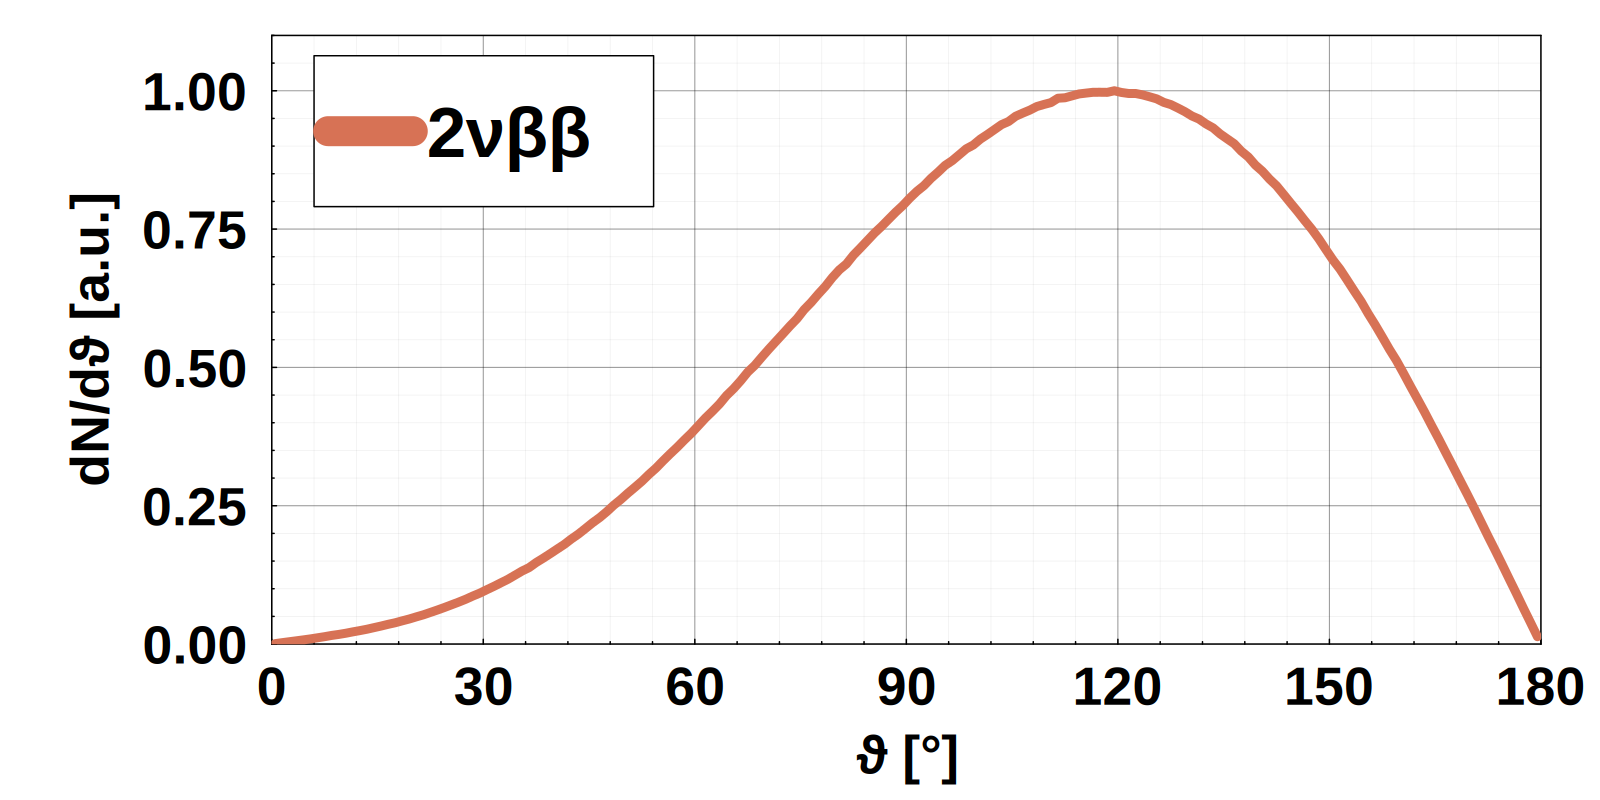

In [71]:
plot(
    midpoints(sh1.edges[1]),
    [sh1.weights],
    series_type= :stepmid,
    label =" 2νββ ",
    lw = 6,
    xlims = (0,180),
    legend= :topleft,
#     widen=:false,
    ylims = (0,1.1),
    ylabel = "dN/dϑ [a.u.]",
    xlabel = "ϑ [°]",
    thickness_scaling = 1.5,
    size = (1600, 800)
)

In [73]:
savefig("SMAngDist.svg")

"/home/shoram/Work/PhD_Thesis/SNImproved2bbSpectra/SMAngDist.svg"

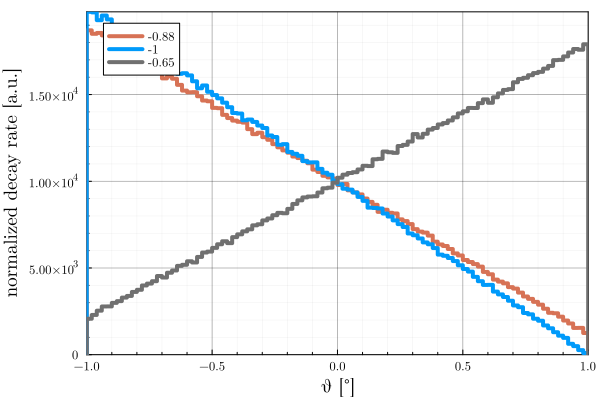

In [12]:
stephist(
    [xs1 xs2 xs3], 
    xlabel ="θ [°]",
    ylabel ="normalized decay rate [a.u.]",
    label  =["-0.88" "-1" "-0.65"],
    lw = 4,
#     ylims = (0.0, 0.012),
    xlims = (-1,1),
    legend= :topleft,
    widen=:false
)

"/home/shoram/Work/PhD_Thesis/SNImproved2bbSpectra/SMAngDist.png"

In [14]:
gr()

Plots.GRBackend()